<a href="https://colab.research.google.com/github/fabiorfc/Financas/blob/master/Fundos_de_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.1) Libraries usadas

In [0]:
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.gridspec as gridspec

### 1.2) Funções Usadas


In [0]:
# Funcao para gerar o campo de data
def calculaCompetencia(dados):
  competencia = []
  for i in range(len(dados)):
    competencia.append(date(dados["ANO"][i], dados["MES"][i], 1))
  dados["COMPETENCIA"] = competencia
  return dados

#plt.plot(arx_income["RENTABILIDADE_LIQUIDA"])
def calcula_media_movel(dados, nome_da_serie):
  rolling_average = dados[nome_da_serie].rolling(window = 12).mean()
  rolling_stddevi = dados[nome_da_serie].rolling(window = 12).std()
  dados["MEDIA_MOVEL_"+nome_da_serie] = rolling_average
  dados["STD_MOVEL_"+nome_da_serie] = rolling_stddevi

  return dados

#Funcao para gerar a análise gráfica univariada
def visualizacao(fundo):
  fig = plt.figure(tight_layout=True, figsize = (12,7))
  gs = gridspec.GridSpec(2, 2)

  ax1 = fig.add_subplot(gs[0, :])
  ax1.plot(fundo["RENTABILIDADE_LIQUIDA"])
  ax1.set_title('Gráficos de Rentabilidade Líquida', fontsize=20)
  ax1.plot(fundo["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "black")
  ax1.set_ylabel('Série')
  ax1.set_xlabel('Competência')

  ax2 = fig.add_subplot(gs[1, 0])
  sns.distplot(fundo.query("ANO == '2017'")["RENTABILIDADE_LIQUIDA"], hist=False, label='2017')
  sns.distplot(fundo.query("ANO == '2018'")["RENTABILIDADE_LIQUIDA"], hist=False, label='2018')
  sns.distplot(fundo.query("ANO == '2019'")["RENTABILIDADE_LIQUIDA"], hist=False, label='2019')
  #sns.distplot(fundo.query("ANO == '2020'")["RENTABILIDADE_LIQUIDA"], hist=False, label='2020')

  ax3 = fig.add_subplot(gs[1, 1])
  sns.boxplot(y = fundo["RENTABILIDADE_LIQUIDA"], x = fundo["ANO"])

  plt.show()

# Tabula os dados
def tabula_dados(base):
  base = calculaCompetencia(base)
  base.sort_values(by = ["COMPETENCIA"], inplace = True)
  base.set_index("COMPETENCIA", inplace = True)
  base = calcula_media_movel(base, "RENTABILIDADE_LIQUIDA")
  return base


### 1.3) Leitura e preparação dos dados

In [31]:
# fundos de renda fixa
btg_pactual = pd.read_csv("BTG_PACTUAL.csv", sep = ',')
tabula_dados(btg_pactual)

icatu_vanguarda = pd.read_csv("ICATU_VANGUARDA.csv", sep = ',')
tabula_dados(icatu_vanguarda)

sul_america = pd.read_csv("SUL_AMERICA.csv", sep = ',')
tabula_dados(sul_america)

# Fundos de renda variavel
indie_fundo = pd.read_csv("INDIE_FUNDO.csv", sep = ',')
tabula_dados(indie_fundo)
print("Tudo certo por aqui!")

Tudo certo por aqui!


___
## **2) Fundos de renda fixa**



### 2.1) btg pactual tesouro ipca curto fundo de investimento renda fixa referenciado


#### **Dados Gerais**
**Nome do Fundo**: 
BTG PACTUAL TESOURO IPCA CURTO FUNDO DE INVESTIMENTO RENDA FIXA REFERENCIADO

**CNPJ**: 
07.539.298/0001-51

**Administrador**:
BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM	

**CNPJ:** 
59.281.253/0001-23

**Situação:**   
EM FUNCIONAMENTO NORMAL	

**Data Início de atividades:** 14/12/2005
**Data de Constituição:** 12/12/2005	Web Site:   


[Web site - BTG Pactual](WWW.BTGPACTUAL.COM)


#### **Caracterização**

**Investimento inicial mínimo:** R$ 3.000

**Estimativa de risco:** 1

**Classe:**
Fundo de Renda Fixa	

**Forma de Condomínio:**
Aberto

**Indicador de desempenho:**
OUTROS

**Fundo Exclusivo:**
NÃO

**Fundo de Cotas:**
NÃO

**Tratamento Tributário de Longo Prazo:**
SIM

**Destinado Exclusivamente a Investidores Qualificados:**
NÃO

#### Análise Individual

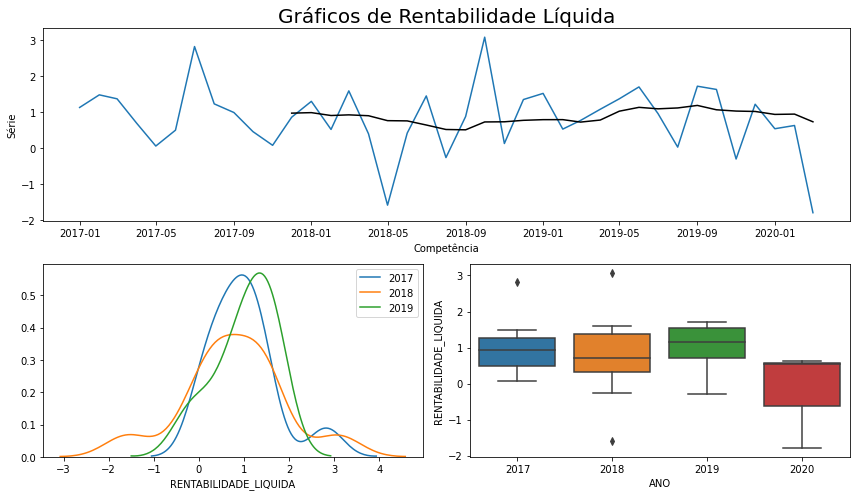

In [22]:
visualizacao(btg_pactual)

### 2.2) icatu vanguarda pré-fixado fundo de investimento renda fixa longo prazo

#### **Dados Gerais**

**Nome do Fundo:** ICATU VANGUARDA PRÉ-FIXADO FUNDO DE INVESTIMENTO RENDA FIXA LONGO PRAZO	

**CNPJ:** 
19.418.031/0001-95

**Administrador:**
BEM - DISTRIBUIDORA DE TITULOS E VALORES IOBILIARIOS LTDA.

**CNPJ:**
00.066.670/0001-00

**Situação Atual:**
EM FUNCIONAMENTO NORMAL	

**Data Início de Atividades:**
11/04/2014

**Data de Constituição:**
25/02/2014

#### **Caracterização**

**Investimento inicial mínimo:** R$ 5.000

**Risco estimado:** 4

**Classe:**
Fundo de Renda Fixa

**Forma de Condomínio:**
Aberto

**Indicador de desempenho:**
IRF-M	Fundo

**Exclusivo:**
NÃO

**Fundo de Cotas:**
NÃO	

**Tratamento Tributário de Longo Prazo:**
SIM

**Destinado Exclusivamente a Investidores Qualificados:**
NÃO

#### Análise individual

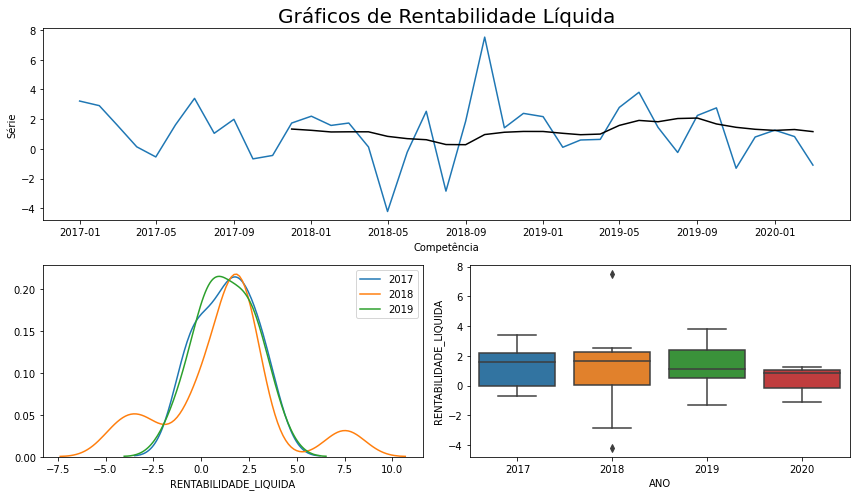

In [24]:
visualizacao(icatu_vanguarda)

### 2.3) sul américa exclusive fundo de investimento renda fixa referenciado di

#### Dados Gerais

**Nome do Fundo:** 
SUL AMÉRICA EXCLUSIVE FUNDO DE INVESTIMENTO RENDA FIXA REFERENCIADO DI

**CNPJ:** 
04.839.017/0001-98

**Administrador:**
SUL AMERICA INVESTIMENTOS DTVM S.A.	

**CNPJ:** 
32.206.435/0001-83

**Situação Atual:**   
EM FUNCIONAMENTO NORMAL	

**Data Início de Atividades:**   
06/02/2002

**Data de Constituição:**
06/02/2002	

[**Web Site**](WWW.SULAMERICAINVESTIMENTOS.COM.BR)

#### Caracterização

**Classe:**
Fundo de Renda Fixa	

**Forma de Condomínio:**
Aberto

**Indicador de desempenho:**
DI de um dia

**Fundo Exclusivo:**
NÃO

**Fundo de Cotas:**
NÃO	

**Tratamento Tributário de Longo Prazo:** 
SIM

**Destinado Exclusivamente a Investidores Qualificados:**
NÃO

#### Análise individual



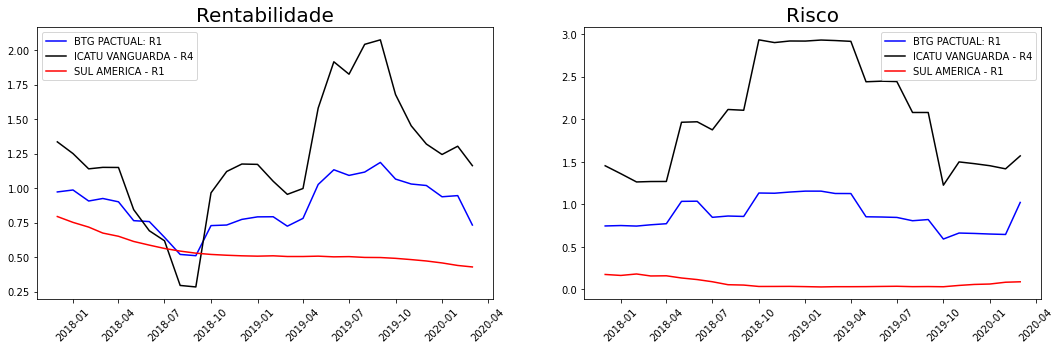

In [28]:
fig, axs = plt.subplots(1,2, figsize = (18,5))

axs[0].set_title('Rentabilidade', fontsize = 20)
axs[0].plot(btg_pactual["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "blue")
axs[0].plot(icatu_vanguarda["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "black")
axs[0].plot(sul_america["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "red")
axs[0].legend(['BTG PACTUAL: R1','ICATU VANGUARDA - R4', 'SUL AMERICA - R1'])
#plt.xticks(rotation=45)

axs[1].set_title('Risco', fontsize = 20)
axs[1].plot(btg_pactual["STD_MOVEL_RENTABILIDADE_LIQUIDA"], color = "blue")
axs[1].plot(icatu_vanguarda["STD_MOVEL_RENTABILIDADE_LIQUIDA"], color = "black")
axs[1].plot(sul_america["STD_MOVEL_RENTABILIDADE_LIQUIDA"], color = "red")
axs[1].legend(['BTG PACTUAL: R1','ICATU VANGUARDA - R4', 'SUL AMERICA - R1'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

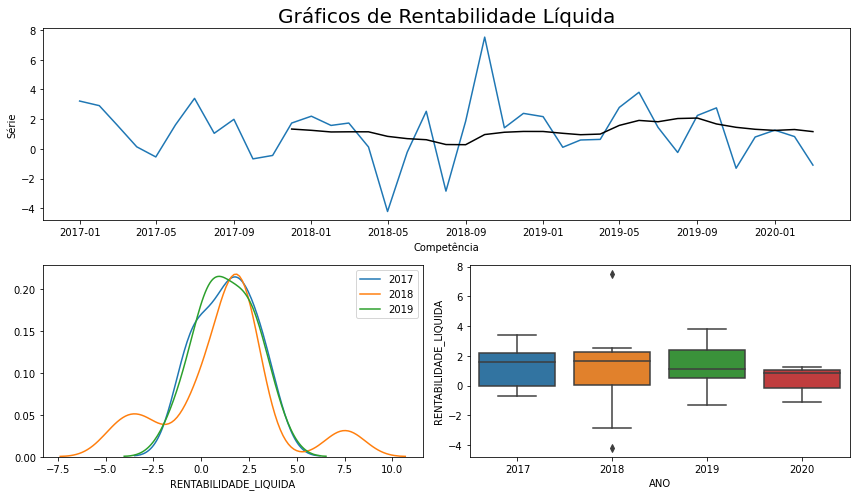

In [23]:
visualizacao(icatu_vanguarda)

## 3) Fundos de renda variada

### 3.1) indie fundo de investimento em cotas de fundos de investimento de ações


#### **Dados Gerais**

**Nome do Fundo**:
INDIE FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES

**CNPJ**:
17.335.646/0001-22

**Administrador**:
INTRAG DTVM LTDA.

**CNPJ**:
62.418.140/0001-31

**Situação Atual**:   
EM FUNCIONAMENTO NORMAL	

**Data Início de Atividades**:
28/12/2012

**Data de Constituição**:
28/12/2012

[**Web Site**](WWW.INTRAG.COM.BR)

#### **Caracterização**

**Classe**:
Fundo de Ações

**Forma de Condomínio**:
Aberto

**Indicador de desempenho**:
IBrX	

**Fundo Exclusivo**:
NÃO

**Fundo de Cotas**:   
SIM	

**Tratamento Tributário de Longo Prazo**:
Não aplicável

**Destinado Exclusivamente a Investidores Qualificados**:
NÃO

#### Análise Individual

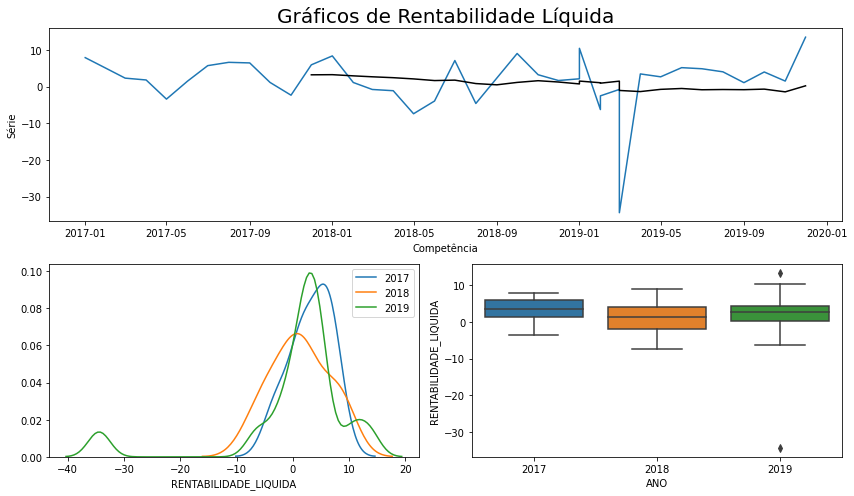

In [32]:
visualizacao(indie_fundo)

___
# **4) Comparação entre os fundos**

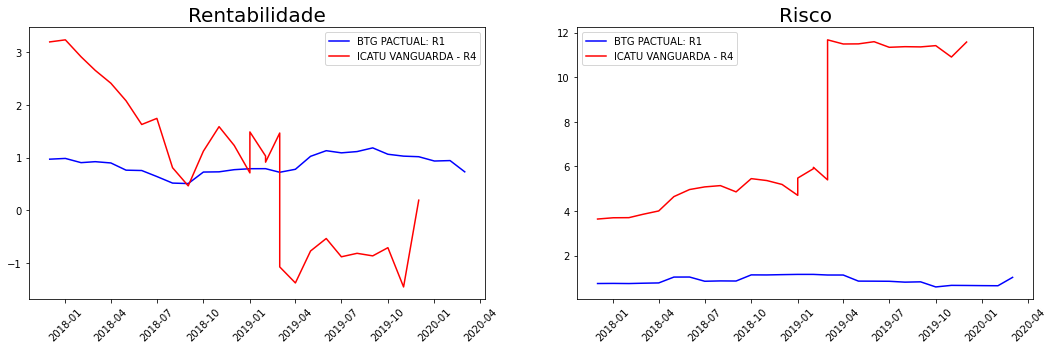

In [33]:
fig, axs = plt.subplots(1,2, figsize = (18,5))

axs[0].set_title('Rentabilidade', fontsize = 20)
axs[0].plot(btg_pactual["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "blue")
axs[0].plot(indie_fundo["MEDIA_MOVEL_RENTABILIDADE_LIQUIDA"], color = "red")
axs[0].legend(['BTG PACTUAL: R1','ICATU VANGUARDA - R4', 'INDIE VAN - R4'])
#plt.xticks(rotation=45)

axs[1].set_title('Risco', fontsize = 20)
axs[1].plot(btg_pactual["STD_MOVEL_RENTABILIDADE_LIQUIDA"], color = "blue")
axs[1].plot(indie_fundo["STD_MOVEL_RENTABILIDADE_LIQUIDA"], color = "red")
axs[1].legend(['BTG PACTUAL: R1','ICATU VANGUARDA - R4', 'INDIE VAN - R4'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()